In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [14]:
# D: input dim/genes
# N: cellcount
# k: Nearest Neighhbor 
# d: output dimension

D = 20000
N = 10000
k = 5
d = 2

In [15]:

X = np.random.rand(N,D)
#cellcount, genecount = np.shape(X)
#N,D = np.shape(X)




In [91]:
# tSNE               ..works better if you PCA down to ~50 dims before tSNE
# O[d*N^2]           ..use truncatedSVD for sparse matrix (no barnes-hut for sparse matrix) 
def tSNE_O(samples,genes,out_dim,k_nn):
    N = samples
    D = genes
    d = out_dim
    k = k_nn
    tSNE_O = (d*(N**2)) # http://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf
    return tSNE_O

# PCA (non kernel pca is linear only)
#  O(D^2*N+D^3)   https://stackoverflow.com/questions/20507646/how-is-the-complexity-of-pca-ominp3-n3
def PCA_O(samples,genes,out_dim,k_nn):
    N = samples
    D = genes
    d = out_dim
    k = k_nn    
    PCA_O = ((D**2)*N) + D**3
    return PCA_O
    

# Local Linear Embedding
#  O[D*log(k)*N*log(N)] + O[D*N*k^3] + O[d*N^2]
def LLE_O(samples,genes,out_dim,k_nn):
    N = samples
    D = genes
    d = out_dim
    k = k_nn
    LLE_O = (D*np.log2(k)*N*np.log2(N)) + (D*N*(k**3)) + (d*(N**2))
    return LLE_O

# Iso Map
#  O[D*log(k)*N*log(N)] + O[(N^2)*(k+log(N))] + O[d*N^2]
def ISO_O(samples,genes,out_dim,k_nn):
    N = samples
    D = genes
    d = out_dim
    k = k_nn    
    ISO_O = (D*np.log2(k)*N*np.log2(N)) + ((N**2)*(k+np.log2(N)) + (d*(N**2)))
    return ISO_O

# spectral embedding
# O[D*log(k)*N*log(N)] + O[D*N*k^3] + O[d*N^2]
def SPECTRAL_O(samples,genes,out_dim,k_nn):
    N = samples
    D = genes
    d = out_dim
    k = k_nn
    SPECTRAL_O = (D*np.log2(k)*N*np.log2(N)) + (D*N*(k**3)) + (d*(N**2))
    return SPECTRAL_O

# Neural Network (AutoEncoder though?)
# AE_O = ?        https://kasperfred.com/posts/computational-complexity-of-neural-networks
# NN_O = N**6, backprop    N**3, feedforward
# ZIFA  ,block vs norm
# ZIFA_O = 
# NNMF (non neg matrix factorization)
# NNMF_O = 
# MIT CSUMI     http://cb.csail.mit.edu/cb/CSUMI/CSUMI.py

# UMAP (uniform manifold approximation and projection)

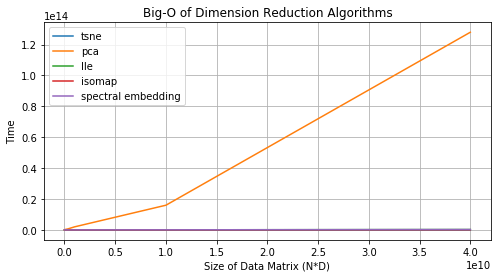

In [94]:
N = [10,50,100,500,1000,3000,5000,7000,10000,20000,40000] # ->> 1,000,000
D = [10,50,100,500,1000,3000,5000,7000,10000,20000,40000]

#Y_matrix_size = N*D
#X_time = 3


tsne_o_vec = []
for i in range(len(N)):
    tsne_o_vec.append(tSNE_O(N[i],D[i],d,k))


pca_o_vec = []
for i in range(len(N)):
    pca_o_vec.append(PCA_O(N[i],D[i],d,k))
    
lle_o_vec = []
for i in range(len(N)):
    lle_o_vec.append(LLE_O(N[i],D[i],d,k))

spectral_o_vec = []
for i in range(len(N)):
    spectral_o_vec.append(SPECTRAL_O(N[i],D[i],d,k))
    
    
iso_o_vec = [] 
for i in range(len(N)):
    iso_o_vec.append(ISO_O(N[i],D[i],d,k))
    

matrix_size = []   
N = [10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]
D = [10,50,100,500,1000,3000,5000,7000,10000,20000,40000]
for i in range(len(N)):
    matrix_size.append(N[i]*D[i])
    
x = matrix_size    
    
    
def num_to_time(num):
    #sec = 1
    #min = sec*60
    #hr = min*60
    #day = hr*24
    #week = day*7
    #month = week*4 + (2*day)
    #year = month*12
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time
    print("d:h:m:s-> %d:%d:%d:%d" % (day, hour, minutes, seconds))
    time_ = [day, hour, minutes, seconds]
    return time_

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(x,tsne_o_vec) 
plt.plot(x,pca_o_vec)
plt.plot(x, lle_o_vec)
plt.plot(x, iso_o_vec)
plt.plot(x, spectral_o_vec)
ax.set(xlabel='Size of Data Matrix (N*D)', ylabel='Time',title='Big-O of Dimension Reduction Algorithms') 
ax.grid()
ax.legend(['tsne','pca','lle','isomap','spectral embedding'])
#ax.set_xlim([0,1e10])
#ax.set_ylim([0,1e13])
ax.autoscale(1)

In [9]:
# use fake data for pca and tsne and 

4.605170185988092